In [2]:
import pandas as pd
import os
from datetime import datetime
import time
from functions import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import rcParams


In [3]:
# Create list of html files in the html folder: Does not weed out non-html
html_pages = os.listdir("resources/html")

# Create DataFrame to concat to
compiled_df = pd.DataFrame()

# Loop through html_pages list to pull in
for page in html_pages:

    # Read in the file using pandas
    # Render the 3rd row as data header skipping the first two rows
    df = pd.read_html(f"resources/html/{page}", header=2)
    
    # Pull the first Table which is the only table in the html page
    data_df = pd.DataFrame(df[0])

    # Convert Ticket to numeric and coerce the rest to NaN
    data_df['Ticket'] = pd.to_numeric(data_df['Ticket'], errors="coerce")

    # Keep only that of Ticket and Size that is not null
    # This keeps trade data then removes the first row of balance
    data_df = data_df[(pd.notnull(data_df['Ticket'])) & (pd.notnull(data_df['Size']))]
    compiled_df = pd.concat([compiled_df, data_df], axis="rows")

In [4]:
# compiled_df.loc[compiled_df['Item'] == "dj30.p"]
compiled_df['Item'].unique()

array(['xauusd', 'dj30.p', '.us30cash', 'nvda', 'googl', 'aapl', 'ymh24'],
      dtype=object)

## Making a dataframe for each asset

### Dow Jones index

In [5]:
dj30_performance_df = compiled_df.loc[compiled_df['Item'] == "dj30.p"]
dj30_performance_df.head()

,Ticket,Open Time,Type,Size,Item,Price,S / L,T / P,Close Time,Price.1,Commission,Taxes,Swap,Profit
1,75801834.0,2024.02.08 15:43:58,buy,20.00,dj30.p,38710.68,38710.58,0.00,2024.02.08 15:43:58,38710.58,0.00,0.00,0.00,-20.00
2,75801957.0,2024.02.08 15:44:02,buy,20.00,dj30.p,38710.68,38710.83,0.00,2024.02.08 15:44:03,38710.83,0.00,0.00,0.00,30.00
3,75802369.0,2024.02.08 15:44:18,buy,20.00,dj30.p,38708.68,38708.58,0.00,2024.02.08 15:44:18,38708.58,0.00,0.00,0.00,-20.00
4,75802447.0,2024.02.08 15:44:19,buy,20.00,dj30.p,38709.68,38709.58,0.00,2024.02.08 15:44:19,38709.58,0.00,0.00,0.00,-20.00
5,75802523.0,2024.02.08 15:44:25,buy,20.00,dj30.p,38709.18,38709.08,0.00,2024.02.08 15:44:25,38709.08,0.00,0.00,0.00,-20.00


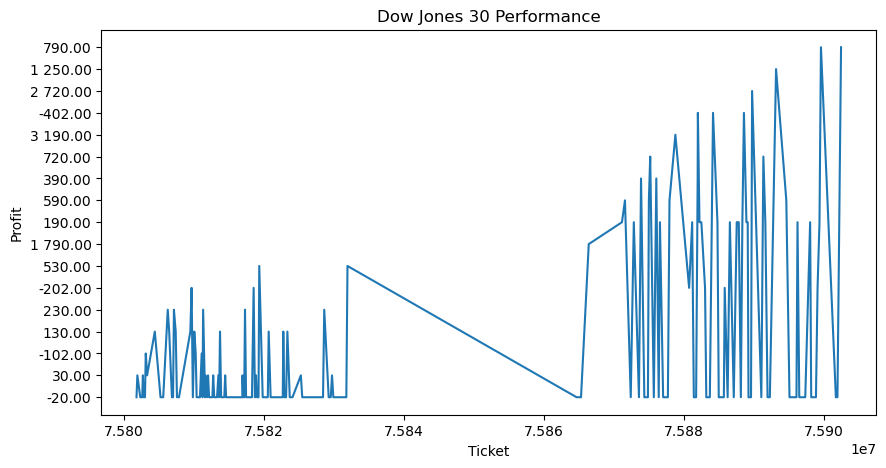

In [6]:
#plot the dj30 performance
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(dj30_performance_df['Ticket'], dj30_performance_df['Profit'])
plt.title('Dow Jones 30 Performance')
plt.xlabel('Ticket')
plt.ylabel('Profit')
plt.show()

### Nvidia

In [7]:
nvda_performance_df = compiled_df.loc[compiled_df['Item'] == "nvda"]
nvda_performance_df.head()

,Ticket,Open Time,Type,Size,Item,Price,S / L,T / P,Close Time,Price.1,Commission,Taxes,Swap,Profit
11,772077929.0,2024.02.29 17:05:02,sell,0.10,nvda,796.12,796.36,0.00,2024.02.29 17:05:02,796.89,-2.39,0.00,0.00,-7.70
12,772077833.0,2024.02.29 17:04:58,sell,0.10,nvda,796.10,796.25,0.00,2024.02.29 17:04:59,796.97,-2.39,0.00,0.00,-8.70
14,772077721.0,2024.02.29 17:04:48,sell,0.10,nvda,796.02,796.27,0.00,2024.02.29 17:04:48,796.41,-2.39,0.00,0.00,-3.90
15,772077654.0,2024.02.29 17:04:44,sell,0.10,nvda,795.87,796.13,0.00,2024.02.29 17:04:45,796.31,-2.39,0.00,0.00,-4.40
17,772077191.0,2024.02.29 17:04:03,sell,0.10,nvda,795.73,795.70,0.00,2024.02.29 17:04:05,795.83,-2.39,0.00,0.00,-1.00


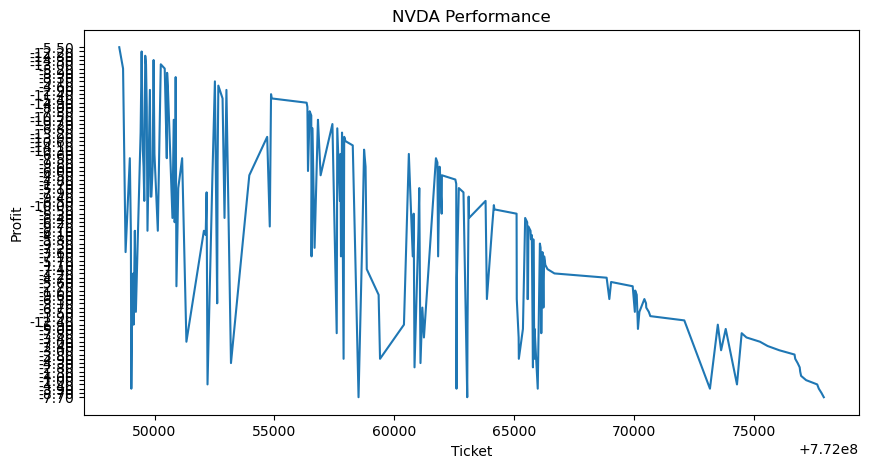

In [8]:
#plot the nvda performance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(nvda_performance_df['Ticket'], nvda_performance_df['Profit'])
plt.title('NVDA Performance')
plt.xlabel('Ticket')
plt.ylabel('Profit')
plt.show()

### Apple

In [9]:
aapl_performance_df = compiled_df.loc[compiled_df['Item'] == "aapl"]
aapl_performance_df.head()

,Ticket,Open Time,Type,Size,Item,Price,S / L,T / P,Close Time,Price.1,Commission,Taxes,Swap,Profit
18,772077014.0,2024.02.29 17:03:50,sell,0.10,aapl,182.04,182.00,0.00,2024.02.29 17:04:24,182.00,-0.55,0.00,0.00,0.40
27,772076428.0,2024.02.29 17:02:54,sell,0.10,aapl,181.92,181.91,0.00,2024.02.29 17:03:30,181.92,-0.55,0.00,0.00,0.00
28,772076210.0,2024.02.29 17:02:38,sell,0.10,aapl,181.85,181.95,0.00,2024.02.29 17:02:52,181.96,-0.55,0.00,0.00,-1.10
31,772075994.0,2024.02.29 17:02:18,sell,0.10,aapl,181.71,181.82,0.00,2024.02.29 17:02:32,181.82,-0.55,0.00,0.00,-1.10
52,772073371.0,2024.02.29 17:00:31,sell,0.10,aapl,181.59,181.57,0.00,2024.02.29 17:00:59,181.59,-0.54,0.00,0.00,0.00


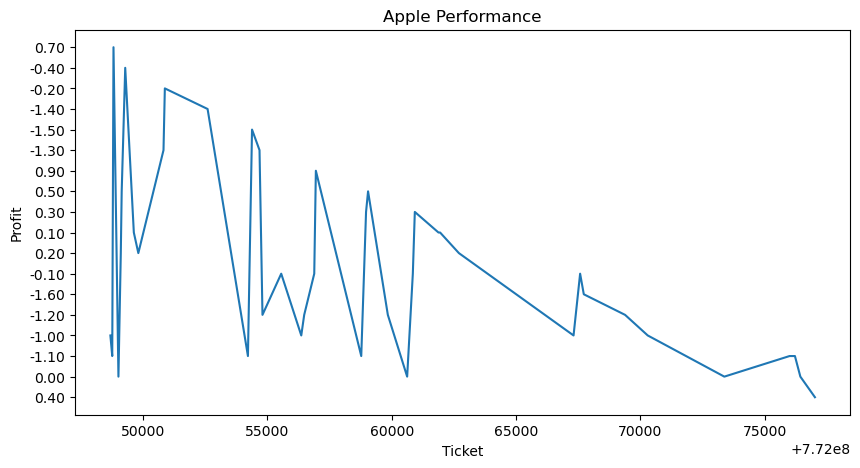

In [10]:
#plot the Apple performance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(aapl_performance_df['Ticket'], aapl_performance_df['Profit'])
plt.title('Apple Performance')
plt.xlabel('Ticket')
plt.ylabel('Profit')
plt.show()

### Google

In [11]:
googl_performance_df = compiled_df.loc[compiled_df['Item'] == "googl"]
googl_performance_df.head()

,Ticket,Open Time,Type,Size,Item,Price,S / L,T / P,Close Time,Price.1,Commission,Taxes,Swap,Profit
13,772077753.0,2024.02.29 17:04:50,buy,0.10,googl,138.35,138.39,0.00,2024.02.29 17:05:11,138.38,-0.42,0.00,0.00,0.30
16,772077625.0,2024.02.29 17:04:43,buy,0.10,googl,138.42,138.32,0.00,2024.02.29 17:04:48,138.30,-0.42,0.00,0.00,-1.20
97,772067842.0,2024.02.29 16:55:55,buy,0.10,googl,138.53,138.57,0.00,2024.02.29 16:56:08,138.57,-0.42,0.00,0.00,0.40
107,772067551.0,2024.02.29 16:55:25,buy,0.10,googl,138.67,138.57,0.00,2024.02.29 16:55:39,138.57,-0.42,0.00,0.00,-1.00
162,772064926.0,2024.02.29 16:51:23,sell,0.10,googl,138.68,138.68,0.00,2024.02.29 16:52:27,138.68,-0.42,0.00,0.00,0.00


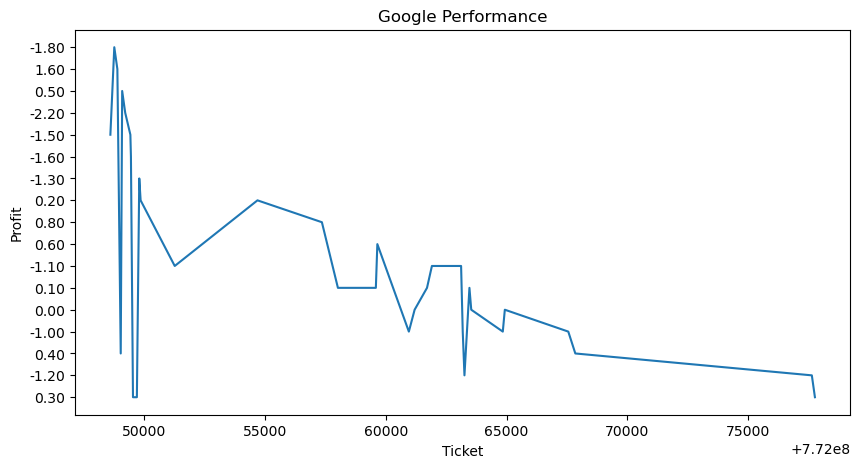

In [12]:
#plot the Google performance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(googl_performance_df['Ticket'], googl_performance_df['Profit'])
plt.title('Google Performance')
plt.xlabel('Ticket')
plt.ylabel('Profit')
plt.show()

### Gold

In [13]:
xauusd_performance_df = compiled_df.loc[compiled_df['Item'] == "xauusd"]
xauusd_performance_df.head()

,Ticket,Open Time,Type,Size,Item,Price,S / L,T / P,Close Time,Price.1,Commission,Taxes,Swap,Profit
0,771062086.0,2024.02.27 16:24:51,buy,0.10,xauusd,2035.47,2035.39,0.00,2024.02.27 16:24:53,2035.37,-0.41,0.00,0.00,-1.00
1,771062150.0,2024.02.27 16:25:00,buy,0.10,xauusd,2035.36,2035.18,0.00,2024.02.27 16:25:07,2035.18,-0.41,0.00,0.00,-1.80
2,771062569.0,2024.02.27 16:25:11,buy,0.10,xauusd,2035.25,2035.12,0.00,2024.02.27 16:25:15,2035.13,-0.41,0.00,0.00,-1.20
3,771062635.0,2024.02.27 16:25:18,buy,0.10,xauusd,2035.09,2035.01,0.00,2024.02.27 16:25:22,2034.95,-0.41,0.00,0.00,-1.40
4,771062739.0,2024.02.27 16:25:24,buy,0.10,xauusd,2034.96,2034.97,0.00,2024.02.27 16:25:26,2034.97,-0.41,0.00,0.00,0.10


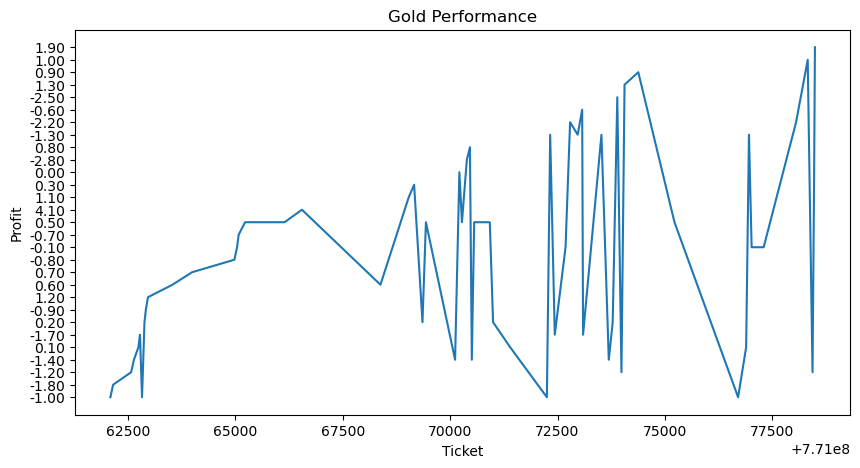

In [14]:
#Plot Gold performance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(xauusd_performance_df['Ticket'], xauusd_performance_df['Profit'])
plt.title('Gold Performance')
plt.xlabel('Ticket')
plt.ylabel('Profit')
plt.show()

## Getting performance metrics for each asset

### Profit

In [15]:
xauusd_performance_df['Profit'] = pd.to_numeric(xauusd_performance_df['Profit'], errors='coerce')
xauusd_profit = xauusd_performance_df['Profit'].sum()
xauusd_profit

C:\Users\farza\AppData\Local\Temp\ipykernel_4660\2845189792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xauusd_performance_df['Profit'] = pd.to_numeric(xauusd_performance_df['Profit'], errors='coerce')


-19.0

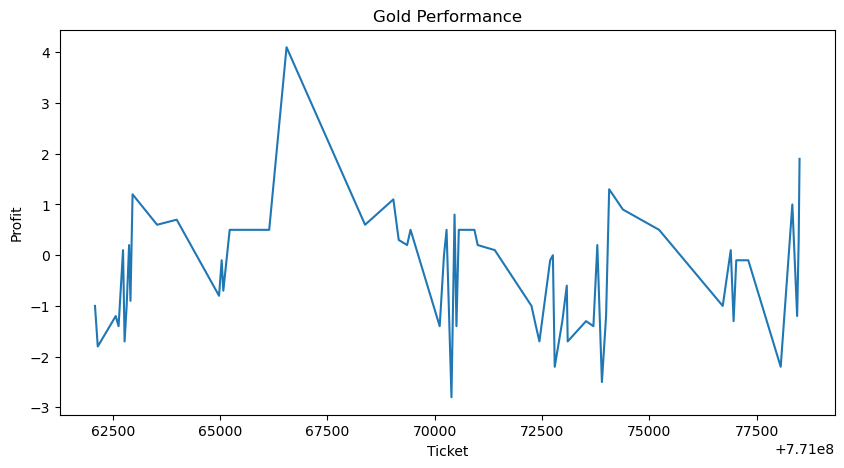

In [16]:
# Plot performance metrics for gold
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(xauusd_performance_df['Ticket'], xauusd_performance_df['Profit'])
plt.title('Gold Performance')
plt.xlabel('Ticket')
plt.ylabel('Profit')
plt.show()

In [17]:
dj30_performance_df['Profit'] = pd.to_numeric(dj30_performance_df['Profit'], errors='coerce')
dj30_profit = dj30_performance_df['Profit'].sum()
dj30_profit

C:\Users\farza\AppData\Local\Temp\ipykernel_4660\2845940998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dj30_performance_df['Profit'] = pd.to_numeric(dj30_performance_df['Profit'], errors='coerce')


7766.0

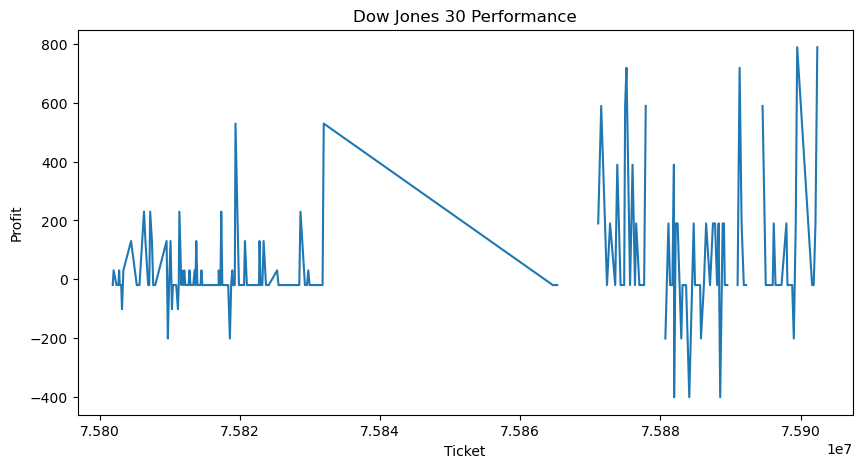

In [41]:
# Plot performance metrics for Dow Jones 30
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(dj30_performance_df['Ticket'], dj30_performance_df['Profit'])
plt.title('Dow Jones 30 Performance')
plt.xlabel('Ticket')
plt.ylabel('Profit')
plt.show()

In [18]:
nvda_performance_df['Profit'] = pd.to_numeric(nvda_performance_df['Profit'], errors='coerce')
nvda_profit = nvda_performance_df['Profit'].sum()
nvda_profit

C:\Users\farza\AppData\Local\Temp\ipykernel_4660\3246019139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nvda_performance_df['Profit'] = pd.to_numeric(nvda_performance_df['Profit'], errors='coerce')


-1209.2

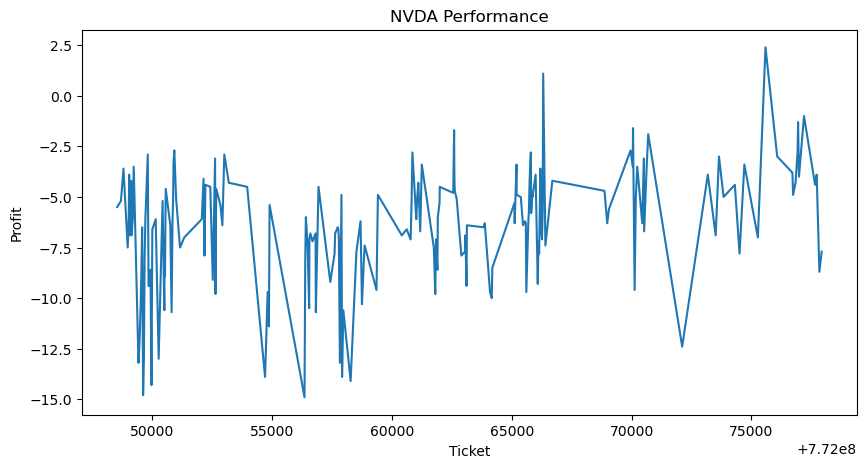

In [42]:
# Plot performance metrics for NVDA
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(nvda_performance_df['Ticket'], nvda_performance_df['Profit'])
plt.title('NVDA Performance')
plt.xlabel('Ticket')
plt.ylabel('Profit')
plt.show()

In [19]:
googl_performance_df['Profit'] = pd.to_numeric(googl_performance_df['Profit'], errors='coerce')
googl_profit = googl_performance_df['Profit'].sum()
googl_profit

C:\Users\farza\AppData\Local\Temp\ipykernel_4660\2233919245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  googl_performance_df['Profit'] = pd.to_numeric(googl_performance_df['Profit'], errors='coerce')


-13.6

In [20]:
aapl_performance_df['Profit'] = pd.to_numeric(aapl_performance_df['Profit'], errors='coerce')
aapl_profit = aapl_performance_df['Profit'].sum()
aapl_profit

C:\Users\farza\AppData\Local\Temp\ipykernel_4660\954919092.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_performance_df['Profit'] = pd.to_numeric(aapl_performance_df['Profit'], errors='coerce')


-17.9

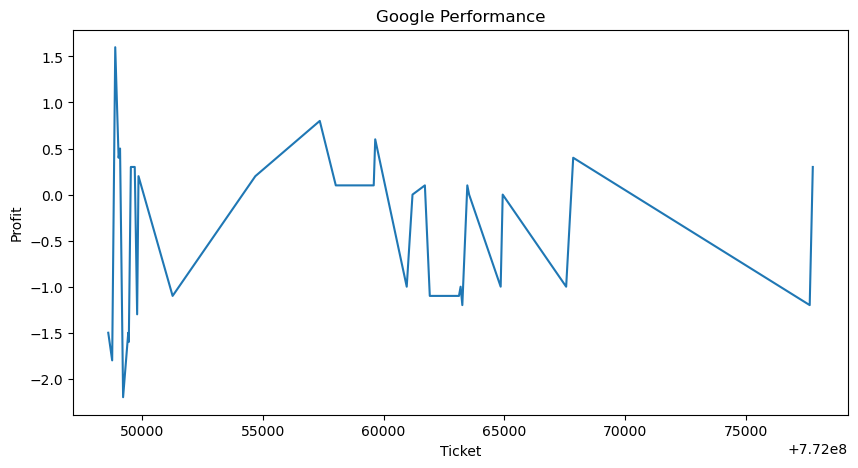

In [43]:
# Plot performance metrics for Google
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(googl_performance_df['Ticket'], googl_performance_df['Profit'])
plt.title('Google Performance')
plt.xlabel('Ticket')
plt.ylabel('Profit')
plt.show()

## Getting the strike rate for each asset

### Gold

In [21]:
gold_winning_trades = len(xauusd_performance_df[xauusd_performance_df['Profit'] > 0])
total_gold_trades = xauusd_performance_df['Profit'].size
gold_winning_trades/total_gold_trades

0.45

### Dow Jones

In [22]:
dj30_winning_trades = len(dj30_performance_df[dj30_performance_df['Profit'] > 0])
total_dj30_trades = dj30_performance_df['Profit'].size
dj30_winning_trades/total_dj30_trades

0.24358974358974358

### Nvidia

In [23]:
nvda_winning_trades = len(nvda_performance_df[nvda_performance_df['Profit'] > 0])
total_nvda_trades = nvda_performance_df['Profit'].size
nvda_winning_trades/total_nvda_trades

0.010752688172043012

### Google

In [24]:
googl_winning_trades = len(googl_performance_df[googl_performance_df['Profit'] > 0])
total_googl_trades = googl_performance_df['Profit'].size
googl_winning_trades/total_googl_trades

0.45454545454545453

### Apple

In [25]:
aapl_winning_trades = len(aapl_performance_df[aapl_performance_df['Profit'] > 0])
total_aapl_trades = aapl_performance_df['Profit'].size
aapl_winning_trades/total_aapl_trades

0.3170731707317073

## Average win and loss for each asset

### Gold

In [26]:
gold_positive_profits = xauusd_performance_df[xauusd_performance_df['Profit'] > 0]['Profit']
average_gold_profit = gold_positive_profits.mean()
print(f"The average positive profit is: {average_gold_profit:.2f}")

The average positive profit is: 0.72


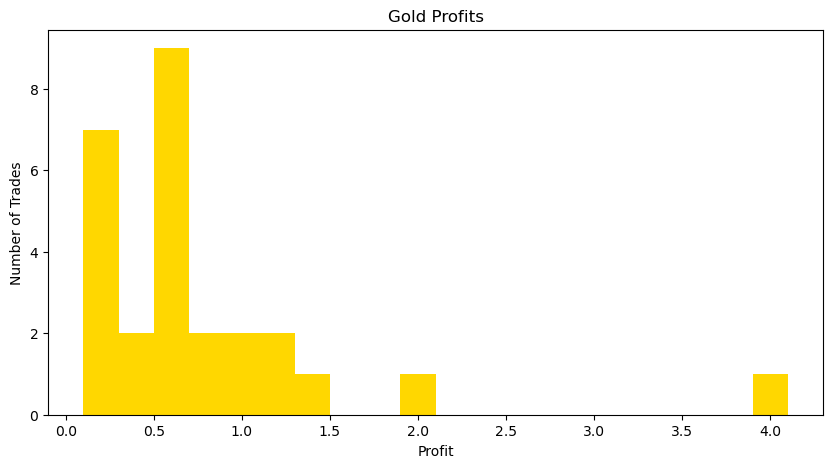

In [27]:
#Plot the Gold profits
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(gold_positive_profits, bins=20, color='gold')
plt.title('Gold Profits')
plt.xlabel('Profit')
plt.ylabel('Number of Trades')
plt.show()

In [28]:
gold_negative_profits = xauusd_performance_df[xauusd_performance_df['Profit'] < 0]['Profit']
average_gold_loss = gold_negative_profits.mean()
print(f"The average loss is: {average_gold_loss:.2f}")

The average loss is: -1.24


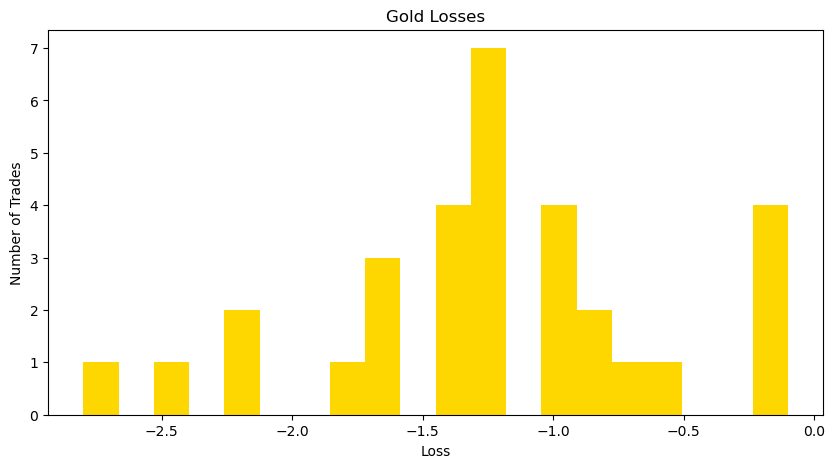

In [45]:
#Plot the Gold losses
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(gold_negative_profits, bins=20, color='gold')
plt.title('Gold Losses')
plt.xlabel('Loss')
plt.ylabel('Number of Trades')
plt.show()

### Dow Jones

In [29]:
dj30_positive_profits = dj30_performance_df[dj30_performance_df['Profit'] > 0]['Profit']
average_dj30_profit = dj30_positive_profits.mean()
print(f"The average positive profit is: {average_dj30_profit:.2f}")

The average positive profit is: 240.53


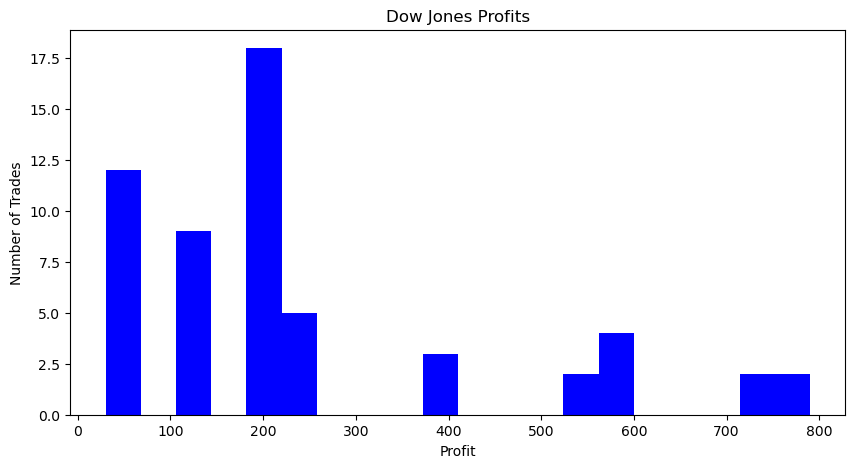

In [30]:
#Plot the Dow Jones profits
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(dj30_positive_profits, bins=20, color='blue')
plt.title('Dow Jones Profits')
plt.xlabel('Profit')
plt.ylabel('Number of Trades')
plt.show()

In [31]:
dj30_negative_profits = dj30_performance_df[dj30_performance_df['Profit'] < 0]['Profit']
average_dj30_loss = dj30_negative_profits.mean()
print(f"The average loss is: {average_dj30_loss:.2f}")

The average loss is: -34.36


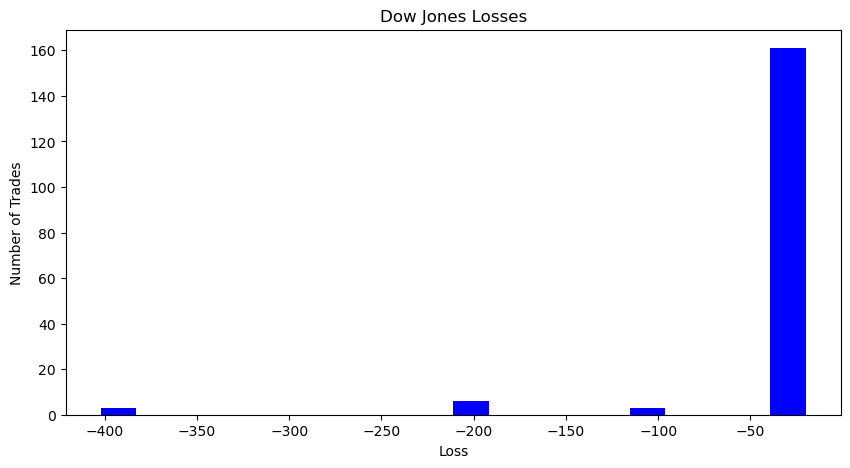

In [46]:
#Plot the Dow Jones losses
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(dj30_negative_profits, bins=20, color='blue')
plt.title('Dow Jones Losses')
plt.xlabel('Loss')
plt.ylabel('Number of Trades')
plt.show()

### Nvidia

In [32]:
nvda_positive_profits = nvda_performance_df[nvda_performance_df['Profit'] > 0]['Profit']
average_nvda_profit = nvda_positive_profits.mean()
print(f"The average positive profit is: {average_nvda_profit:.2f}")

The average positive profit is: 1.75


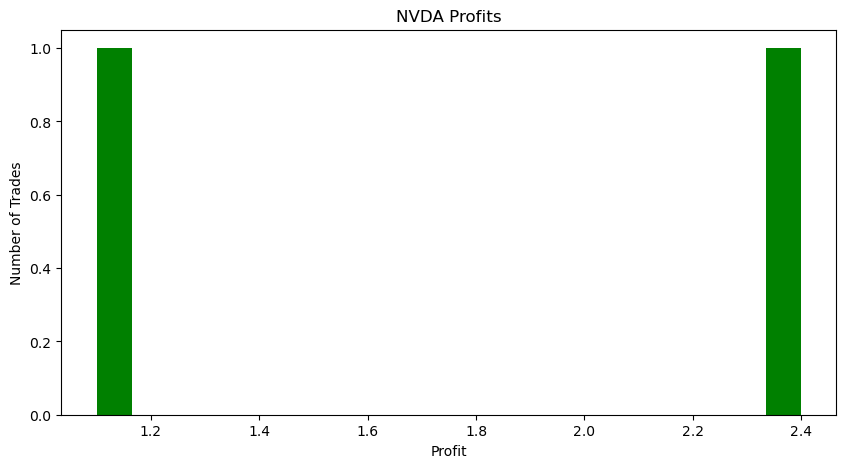

In [47]:
#Plot the NVDA profits
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(nvda_positive_profits, bins=20, color='green')
plt.title('NVDA Profits')
plt.xlabel('Profit')
plt.ylabel('Number of Trades')
plt.show()

In [33]:
nvda_negative_profits = nvda_performance_df[nvda_performance_df['Profit'] < 0]['Profit']
average_nvda_loss = nvda_negative_profits.mean()
print(f"The average loss is: {average_nvda_loss:.2f}")

The average loss is: -6.59


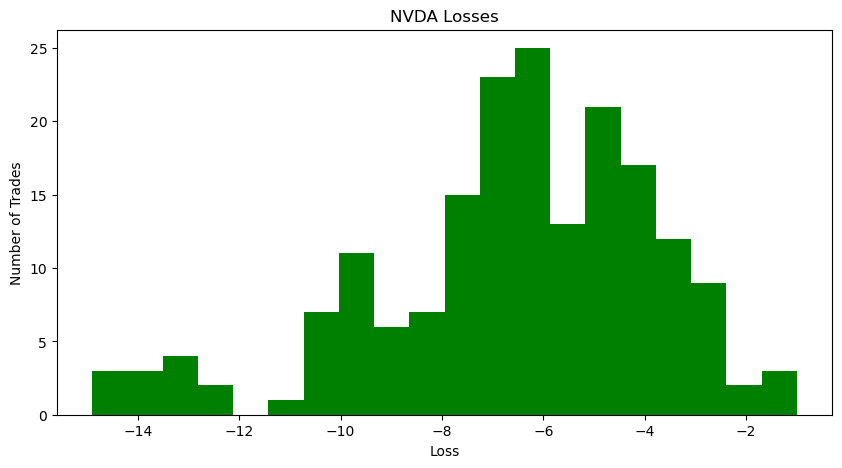

In [48]:
#Plot the NVDA losses
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(nvda_negative_profits, bins=20, color='green')
plt.title('NVDA Losses')
plt.xlabel('Loss')
plt.ylabel('Number of Trades')
plt.show()

### Google

In [34]:
googl_positive_profits = googl_performance_df[googl_performance_df['Profit'] > 0]['Profit']
average_googl_profit = googl_positive_profits.mean()
print(f"The average positive profit is: {average_googl_profit:.2f}")

The average positive profit is: 0.40


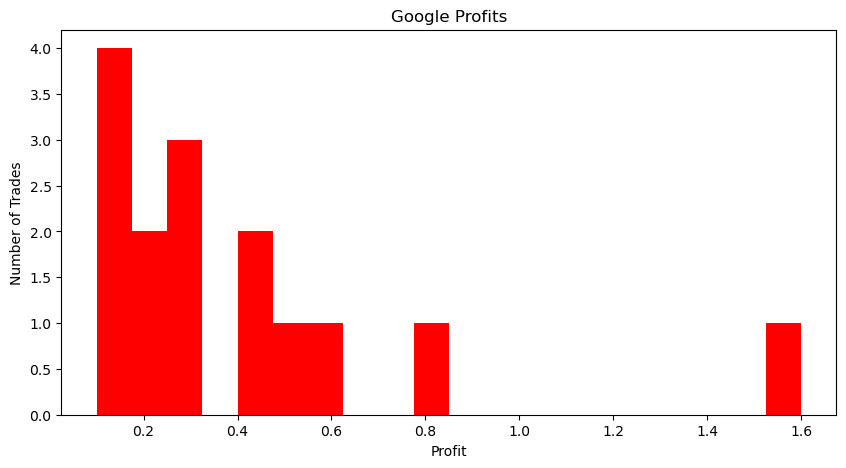

In [49]:
#Plot the Google profits
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(googl_positive_profits, bins=20, color='red')
plt.title('Google Profits')
plt.xlabel('Profit')
plt.ylabel('Number of Trades')
plt.show()

In [35]:
googl_negative_profits = googl_performance_df[googl_performance_df['Profit'] < 0]['Profit']
average_googl_loss = googl_negative_profits.mean()
print(f"The average loss is: {average_googl_loss:.2f}")

The average loss is: -1.31


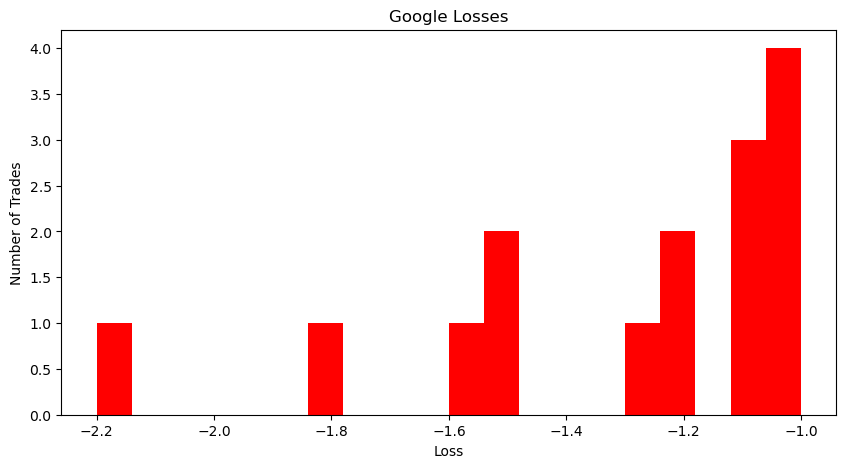

In [50]:
#Plot the Google losses
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(googl_negative_profits, bins=20, color='red')
plt.title('Google Losses')
plt.xlabel('Loss')
plt.ylabel('Number of Trades')
plt.show()

### Apple

In [36]:
aapl_positive_profits = aapl_performance_df[aapl_performance_df['Profit'] > 0]['Profit']
average_aapl_profit = aapl_positive_profits.mean()
print(f"The average positive profit is: {average_aapl_profit:.2f}")

The average positive profit is: 0.35


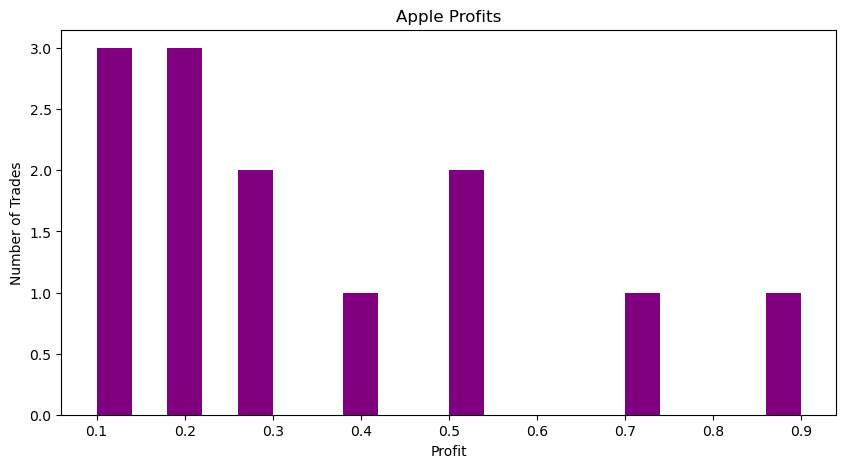

In [51]:
#Plot the Apple profits
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(aapl_positive_profits, bins=20, color='purple')
plt.title('Apple Profits')
plt.xlabel('Profit')
plt.ylabel('Number of Trades')
plt.show()

In [37]:
aapl_negative_profits = aapl_performance_df[aapl_performance_df['Profit'] < 0]['Profit']
average_aapl_loss = aapl_negative_profits.mean()
print(f"The average loss is: {average_aapl_loss:.2f}")

The average loss is: -0.93


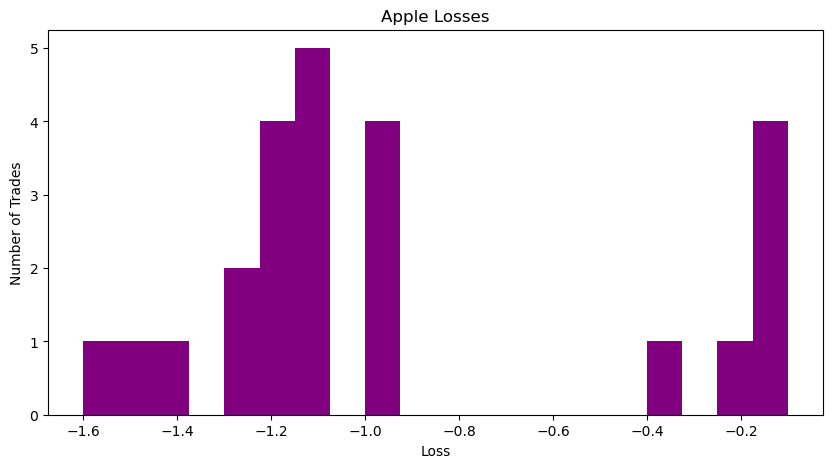

In [52]:
#Plot the Apple losses
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(aapl_negative_profits, bins=20, color='purple')
plt.title('Apple Losses')
plt.xlabel('Loss')
plt.ylabel('Number of Trades')
plt.show()

## Assembling dataframe with of all metrics

In [38]:
profit_metrics_df = {
    'xauusd': {'Profit': xauusd_profit, 'Strikerate': gold_winning_trades/total_gold_trades, 'Average Win': average_gold_profit, 'Average Loss': average_gold_loss},
    'dj30': {'Profit': dj30_profit, 'Strikerate': dj30_winning_trades/total_dj30_trades, 'Average Win': average_dj30_profit, 'Average Loss': average_dj30_loss},
    'nvda': {'Profit': nvda_profit, 'Strikerate': nvda_winning_trades/total_nvda_trades, 'Average Win': average_nvda_profit, 'Average Loss': average_nvda_loss},
    'googl': {'Profit': googl_profit, 'Strikerate': googl_winning_trades/total_googl_trades, 'Average Win': average_googl_profit, 'Average Loss': average_aapl_loss},
    'aapl': {'Profit': aapl_profit, 'Strikerate': aapl_winning_trades/total_aapl_trades, 'Average Win': average_aapl_profit, 'Average Loss': average_aapl_loss}
}

# Create the DataFrame
df = pd.DataFrame(profit_metrics_df)


In [39]:
df.head()

,xauusd,dj30,nvda,googl,aapl
Profit,-19.000000,7766.000000,-1209.200000,-13.600000,-17.900000
Strikerate,0.450000,0.243590,0.010753,0.454545,0.317073
Average Win,0.718519,240.526316,1.750000,0.400000,0.346154
Average Loss,-1.238710,-34.358382,-6.590761,-0.933333,-0.933333


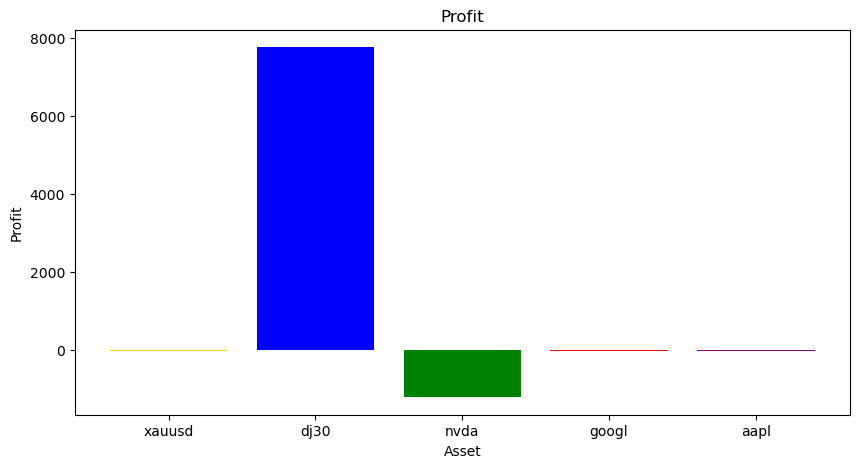

In [54]:
# Plot the profit metrics for df
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(df.columns, df.loc['Profit'], color=['gold', 'blue', 'green', 'red', 'purple'])
ax.set_title('Profit')
ax.set_ylabel('Profit')
ax.set_xlabel('Asset')
plt.show()

